# M01 Tính toán vector hóa

## Mục đích

Giới thiệu thư viện NumPy để làm quen với tính toán vector hóa.


## Tính toán vector hóa

Nếu bạn đã sử dụng R thì bạn biết rằng chúng ta có thể có một danh sách các số (gọi là `vector`) và thực hiện một phép tính nào đó với từng phần tử của danh sách đó. Chẳng hạn:

```r
v <- c(1, 2, 3, 4, 5)
v + 1
```

Trong Python, bạn không thể làm tương tự như vậy. Lệnh sau sẽ báo lỗi khi thực hiện:

```python
v = [1, 2, 3, 4, 5]
v + 1
```

```
TypeError: can only concatenate list (not "int") to list
```

Exception này nghe hơi kì lạ, nhưng thật ra rất có lí, vì Python hiểu toán tử `+` sử dụng cho cấu trúc dữ liệu `list` là để nối hai `list` với nhau, tuy nhiên `1` lại không phải là `list` mà là kiểu `int`. Nếu muốn thực hiện phép tính cộng cho từng phần tử, bạn sẽ cần dùng list comprehension.

In [1]:
v = [1, 2, 3, 4, 5]
[i + 1 for i in v]

[2, 3, 4, 5, 6]

Mặc dù list comprehension đã được tối ưu hơn vòng lặp `for`, nhưng nó vẫn sẽ rất chậm khi tiến hành với danh sách có kích thước lớn, bởi quá trình thực hiện phép tính cộng cho từng phần tử gồm nhiều bước (truy cập bộ nhớ, thực hiện phép tính, ghi kết quả tính vào bộ nhớ, di chuyển con trỏ xuống đối tượng tiếp theo, v.v.).

R không thực hiện việc tính toán như vậy cho cấu trúc dữ liệu `vector`, mà nó sẽ "vectorize" việc tính toán. Có thể hiểu đơn giản là việc tính toán vẫn diễn ra cho từng phần tử, nhưng được tiến hành cùng một lúc với nhau, do đó giảm thiểu các bước phải truy xuất bộ nhớ. Bản thân Python không hỗ trợ việc này, nhưng thư viện mở rộng của Python thì có, và chúng ta sẽ làm quen với thư viện NumPy. Để bắt đầu, chúng ta sẽ tải thư viện này vào bộ nhớ. Nhóm phát triển NumPy khuyến cáo bạn viết tắt tên thư viện là `np` để thống nhất với tất cả các lập trình viên trên thế giới.

In [2]:
import numpy as np

## Cấu trúc `array`

Cấu trúc `array` (mảng) trong NumPy tương tự như `list` của Python và `vector` của R. Nó là một danh sách các phần tử. Khác với `list`, tất cả các phần tử trong `array` sẽ có cùng kiểu dữ liệu; chỉ cần một phần tử có kiểu dữ liệu `str`, tất cả các phần tử còn lại sẽ được chuyển đổi về kiểu `str`.

Chúng ta sẽ khai báo một mảng dựa trên danh sách `v` ở trên.

In [3]:
a = np.array(v)
a

array([1, 2, 3, 4, 5])

Bây giờ hãy thực hiện tính cộng trên mảng này.

In [4]:
a + 1

array([2, 3, 4, 5, 6])

NumPy cũng vectorize một số hàm để bạn có thể sử dụng trên `array`, chẳng hạn khai căn bậc hai.

In [5]:
np.sqrt(a)

array([1.        , 1.41421356, 1.73205081, 2.        , 2.23606798])

Còn tiện dụng hơn, bạn có thể dùng các hàm này trên `list`, và NumPy sẽ tự động tạo ra một mảng kết quả từ danh sách này.

In [6]:
np.sqrt(v)

array([1.        , 1.41421356, 1.73205081, 2.        , 2.23606798])

### Mảng hai chiều

Bạn có thể tạo ra một ma trận (tương tự như `matrix` của R) bằng cách đưa một danh sách lồng vào đối số của `np.array()`. Để tạo ra một ma trận m hàng x n cột, danh sách lồng này phải có m phần tử, mỗi phần tử là một danh sách có n giá trị.

In [7]:
m = np.array([
    [1, 2, 3, 4],
    [3, 5, 7, 9],
    [10, 20, 30, 40]
])
m

array([[ 1,  2,  3,  4],
       [ 3,  5,  7,  9],
       [10, 20, 30, 40]])

Bạn có thể mở rộng ma trận này bằng `np.append()`.

In [8]:
newrow = np.array([2, 4, 6, 8])
n = np.append(m, [newrow], axis=0)
n

array([[ 1,  2,  3,  4],
       [ 3,  5,  7,  9],
       [10, 20, 30, 40],
       [ 2,  4,  6,  8]])

Bạn có thể thực hiện các phép tính với ma trận này tương tự như với mảng một chiều.

In [9]:
m * 2

array([[ 2,  4,  6,  8],
       [ 6, 10, 14, 18],
       [20, 40, 60, 80]])

NumPy cũng hỗ trợ các phép toán của ma trận như chuyển vị:

In [10]:
np.transpose(n)

array([[ 1,  3, 10,  2],
       [ 2,  5, 20,  4],
       [ 3,  7, 30,  6],
       [ 4,  9, 40,  8]])

hay nhân ma trận (dot product)

In [11]:
m @ n

array([[  45,   88,  131,  174],
       [ 106,  207,  308,  409],
       [ 450,  880, 1310, 1740]])

hay lập ma trận đường chéo

In [12]:
np.diag(np.diag(n))

array([[ 1,  0,  0,  0],
       [ 0,  5,  0,  0],
       [ 0,  0, 30,  0],
       [ 0,  0,  0,  8]])

## Tạo một số mảng mới đặc biệt

Bạn có thể tạo một mảng toàn các số 0.

In [13]:
np.zeros(shape=(3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Hoặc mảng toàn số 1.

In [14]:
np.ones(shape=(2, 3))

array([[1., 1., 1.],
       [1., 1., 1.]])

Hoặc ma trận đơn vị.

In [15]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Hoặc một mảng với các số tăng dần (tương tự như `range()` của Python).

In [16]:
np.arange(2, 15, 3)

array([ 2,  5,  8, 11, 14])

Trong trường hợp bạn xác định được điểm đầu, điểm cuối, và số phần tử (nhưng không muốn tính toán bước nhảy), bạn có thể sử dụng `np.linspace()` hoặc `np.logspace()` (cho thang ratio).

In [17]:
np.linspace(1, 10, 3)

array([ 1. ,  5.5, 10. ])

## Luyện tập

Trong hệ tọa độ Descartes phẳng (2 chiều), có một vector $\vec{v} = \langle x, y \rangle$. Chúng ta sẽ xoay vector này đi một góc $\theta$ ngược chiều kim đồng hồ bằng cách sử dụng ma trận xoay $R$ (rotation matrix). Ma trận xoay có dạng như sau:

$$
R = \left[
    \begin{matrix}
    \cos \theta & -\sin \theta \\
    \sin \theta & \cos \theta
    \end{matrix}
\right]
$$

Vector xoay là kết quả phép nhân ma trận xoay với vector gốc. Chúng ta sẽ phải chuyển vị vector từ dạng hàng sang dạng cột để nhân ma trận. Vì kết quả trả về là một vector dạng cột, chúng ta sẽ chuyển vị nó một lần nữa sang dạng hàng.

$$
v_R = (R \cdot v^T)^T
$$

Bạn có thể dùng luôn hàm `np.sin()` và `np.cos()` để tính sine và cosine, hoặc dùng hai hàm này trong thư viện `math`.

In [18]:
def rotation_matrix(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])

v = np.array([1, 2])
R = rotation_matrix(np.pi / 2)    # Xoay 90 độ ngược chiều kim đồng hồ
v_R = np.transpose(R @ np.transpose(v))

v_R

array([-2.,  1.])

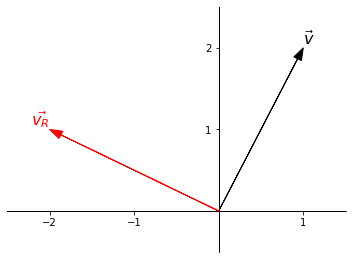

In [19]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(5, 3.7), tight_layout=True)

ax.axhline(0, color="k", lw=1)
ax.axvline(0, color="k", lw=1)

ax.arrow(0, 0, *v, color="k", length_includes_head=True, head_width=0.1)
ax.text(*v, r"$\vec{v}$", fontsize=16, va="bottom", ha="left")
ax.arrow(0, 0, *v_R, color="r", length_includes_head=True, head_width=0.1)
ax.text(*v_R, r"$\vec{v_R}$", color="r", fontsize=16, va="bottom", ha="right")

ax.set_xticks([-2, -1, 1])
ax.set_yticks([1, 2])
ax.set_xlim(-2.5, 1.5)
ax.set_ylim(-0.5, 2.5)

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

plt.show()

---

[Bài trước](../02_inter/05_exceptions.ipynb) - [Danh sách bài](../README.md) - [Bài sau](./02_random.ipynb)